<a href="https://colab.research.google.com/github/dsaint31x/OpenCV_Python_Tutorial/blob/master/DIP/2021/%EC%9D%B4%EA%B0%80%EC%9D%80/211112_%EC%98%81%EC%83%81%EC%B2%98%EB%A6%AC_feature_descriptor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://bkshin.tistory.com/entry/OpenCV-27-%ED%8A%B9%EC%A7%95-%EB%94%94%EC%8A%A4%ED%81%AC%EB%A6%BD%ED%84%B0-%EA%B2%80%EC%B6%9C%EA%B8%B0-SIFT-SURF-ORB?category=1148027

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 이미지 특징점
* 이미지 특징점이란 말 그대로 이미지에서 특징이 되는 부분을 의미
* 이미지끼리 서로 매칭이 되는지 확인을 할 때 각 이미지에서의 특징이 되는 부분끼리 비교
* 이미지 매칭 시 사용하는 것이 바로 특징점
* 특징점은 영어로 키 포인트(Keypoints)라고도 합니다. 보통 특징점이 되는 부분은 물체의 모서리나 코너입니다.

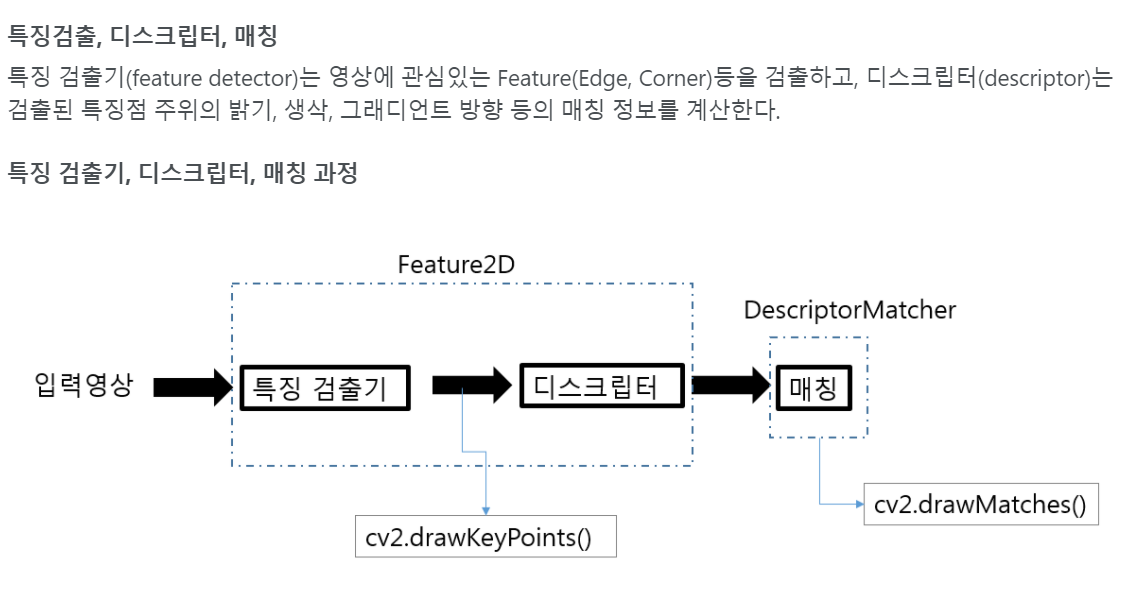

## cv2.keypoint

* Keypoint: 특징점 정보를 담는 객체
* pt: 특징점 좌표(x, y), float 타입으로 정수 변환 필요
* size: 의미 있는 특징점 이웃의 반지름
* angle: 특징점 방향 (시계방향, -1=의미 없음)
* response: 특징점 반응 강도 (추출기에 따라 다름)
* octave: 발견된 이미지 피라미드 계층
* class_id: 특징점이 속한 객체 ID

## keypoints = detector.detect(img, mask)
* 특징점 검출 함수
* img: 입력 이미지
* mask(optional): 검출 제외 마스크
* keypoints: 특징점 검출 결과 (KeyPoint의 리스트)

## outImg = cv2.drawKeypoints(img, keypoints, outImg, color, flags)
* keypoint 표시해준다
* img: 입력 이미지
* keypoints: 표시할 특징점 리스트
* outImg: 특징점이 그려진 결과 이미지
* color(optional): 표시할 색상 (default: 랜덤)
* flags(optional): 표시 방법
> (cv2.DRAW_MATCHES_FLAGS_DEFAULT: 좌표 중심에 동그라미만 그림(default),
> cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS : 동그라미의 크기를 size와 angle을 반영해서 그림)

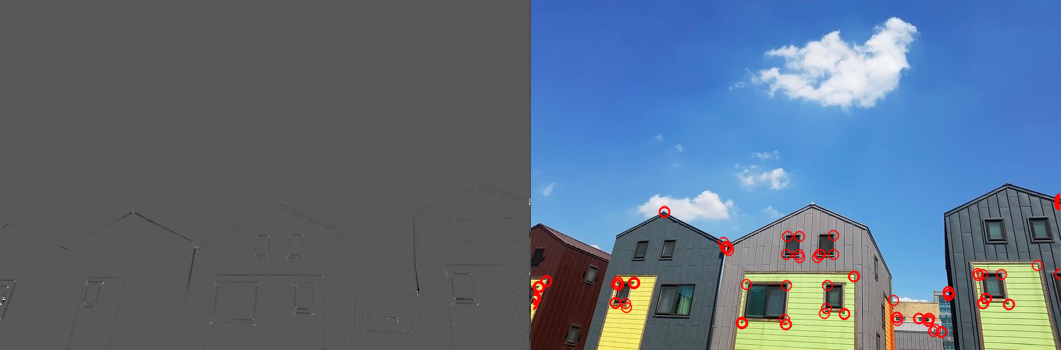

In [4]:
# 해리스 코너 검출 (corner_harris.py)

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/가은/2021/영상처리/images/house.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 해리스 코너 검출 ---①
corner = cv2.cornerHarris(gray, 2, 3, 0.04)
# 변화량 결과의 최대값 10% 이상의 좌표 구하기 ---②
coord = np.where(corner > 0.1* corner.max())
coord = np.stack((coord[1], coord[0]), axis=-1)

# 코너 좌표에 동그리미 그리기 ---③
for x, y in coord:
    cv2.circle(img, (x,y), 5, (0,0,255), 1, cv2.LINE_AA)

# 변화량을 영상으로 표현하기 위해서 0~255로 정규화 ---④
corner_norm = cv2.normalize(corner, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
# 화면에 출력
corner_norm = cv2.cvtColor(corner_norm, cv2.COLOR_GRAY2BGR)
merged = np.hstack((corner_norm, img))
cv2_imshow(merged)
cv2.waitKey()
cv2.destroyAllWindows()

## OpenCV는 특징 디스크립터를 추출하기 위해 다음과 같은 함수를 제공합니다.

## keypoints, descriptors = detector.compute(image, keypoins, descriptors)
* 특징점을 전달하면 특징 디스크립터를 계산해서 반환
## keypoints, descriptors = detector.detectAndCompute(image, mask, decriptors, useProvidedKeypoints)
* 특징점 검출과 특징 디스크립터 계산을 한 번에 수행
> * image: 입력 이미지
> * keypoints: 디스크립터 계산을 위해 사용할 특징점
> * descriptors(optional): 계산된 디스크립터
> * mask(optional): 특징점 검출에 사용할 마스크
> * useProvidedKeypoints(optional): True인 경우 특징점 검출을 수행하지 않음

## SIFT (Scale-Invariant Feature Transform)
* 기존의 해리스 코너 검출 알고리즘은 크기 변화에 민감한 문제를 가지고 있었습니다
* SIFT는 이미지 피라미드를 이용해서 크기 변화에 따른 특징점 검출 문제를 해결한 알고리즘입니다.

## detector = cv2.xfeatures2d.SIFT_create(nfeatures, nOctaveLayers, contrastThreshold, edgeThreshold, sigma)
> * nfeatures: 검출 최대 특징 수
> * nOctaveLayers: 이미지 피라미드에 사용할 계층 수
> * contrastThreshold: 필터링할 빈약한 특징 문턱 값
> * edgeThreshold: 필터링할 엣지 문턱 값
> * sigma: 이미지 피라미드 0 계층에서 사용할 가우시안 필터의 시그마 값

In [10]:
!pip install opencv-python==3.4.2.16

ERROR: Could not find a version that satisfies the requirement opencv-python==3.4.2.16 (from versions: 3.4.2.17, 3.4.3.18, 3.4.4.19, 3.4.5.20, 3.4.6.27, 3.4.7.28, 3.4.8.29, 3.4.9.31, 3.4.9.33, 3.4.10.35, 3.4.10.37, 3.4.11.39, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.14.51, 3.4.14.53, 3.4.15.55, 3.4.16.57, 4.0.0.21, 4.0.1.23, 4.0.1.24, 4.1.0.25, 4.1.1.26, 4.1.2.30, 4.2.0.32, 4.2.0.34, 4.3.0.36, 4.3.0.38, 4.4.0.40, 4.4.0.42, 4.4.0.44, 4.4.0.46, 4.5.1.48, 4.5.2.52, 4.5.2.54, 4.5.3.56, 4.5.4.58)
ERROR: No matching distribution found for opencv-python==3.4.2.16


In [11]:
!pip install opencv-contrib-python==3.4.2.16

ERROR: Could not find a version that satisfies the requirement opencv-contrib-python==3.4.2.16 (from versions: 3.4.2.17, 3.4.3.18, 3.4.4.19, 3.4.5.20, 3.4.6.27, 3.4.7.28, 3.4.8.29, 3.4.9.31, 3.4.9.33, 3.4.10.35, 3.4.10.37, 3.4.11.39, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.14.51, 3.4.14.53, 3.4.15.55, 4.0.0.21, 4.0.1.23, 4.0.1.24, 4.1.0.25, 4.1.1.26, 4.1.2.30, 4.2.0.32, 4.2.0.34, 4.3.0.36, 4.3.0.38, 4.4.0.40, 4.4.0.42, 4.4.0.44, 4.4.0.46, 4.5.1.48, 4.5.2.52, 4.5.2.54, 4.5.3.56, 4.5.4.58)
ERROR: No matching distribution found for opencv-contrib-python==3.4.2.16


In [ ]:
# SIFT로 특징점 및 디스크립터 추출(desc_sift.py)

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/가은/2021/영상처리/images/house.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# SIFT 추출기 생성
sift = cv2.xfeatures2d.SIFT_create()
# 키 포인트 검출과 서술자 계산
keypoints, descriptor = sift.detectAndCompute(gray, None)
print('keypoint:',len(keypoints), 'descriptor:', descriptor.shape)
print(descriptor)

# 키 포인트 그리기
img_draw = cv2.drawKeypoints(img, keypoints, None, \
                flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# 결과 출력
cv2_imshow(img_draw)
cv2.waitKey()
cv2.destroyAllWindows()

## SURF (Speeded Up Robust Features)
* SIFT는 크기 변화에 따른 특징 검출 문제를 해결하기 위해 이미지 피라미드를 사용하므로 속도가 느리다는 단점이 있습니다.
* SURF는 이미지 피라미드 대신 필터의 크기를 변화시키는 방식으로 성능을 개선한 알고리즘입니다.

## detector = cv2.xfeatures2d.SURF_create(hessianThreshold, nOctaves, nOctaveLayers, extended, upright)
> * hessianThreshold(optional): 특징 추출 경계 값 (default=100)
> * nOctaves(optional): 이미지 피라미드 계층 수 (default=3)
> * extended(optional): 디스크립터 생성 플래그 (default=False), True: 128개, False: 64개
> * upright(optional): 방향 계산 플래그 (default=False), True: 방향 무시, False: 방향 적용

In [22]:
# SURF로 특징점 및 특징 디스크립터 추출 (desc_surf.py)

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/가은/2021/영상처리/images/house.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# SURF 추출기 생성 ( 경계:1000, 피라미드:3, 서술자확장:True, 방향적용:True)
surf = cv2.xfeatures2d.SURF_create(1000, 3, True, True)
# 키 포인트 검출 및 서술자 계산
keypoints, desc = surf.detectAndCompute(gray, None)
print(desc.shape, desc)
# 키포인트 이미지에 그리기
img_draw = cv2.drawKeypoints(img, keypoints, None, \
                flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2_imshow(img_draw)
cv2.waitKey()
cv2.destroyAllWindows()

## ORB (Oriented and Rotated BRIEF)
* 디스크립터 검출기 중 BRIEF(Binary Robust Independent Elementary Features)라는 것이 있습니다.
* BRIEF는 특징점 검출은 지원하지 않는 디스크립터 추출기입니다.
* 이 BRIEF에 방향과 회전을 고려하도록 개선한 알고리즘이 바로 ORB입니다.
* 이 알고리즘은 특징점 검출 알고리즘으로 FAST를 사용하고 회전과 방향을 고려하도록 개선했으며 속도도 빨라 SIFT와 SURF의 좋은 대안으로 사용됩니다.

## detector = cv2.ORB_create(nfeatures, scaleFactor, nlevels, edgeThreshold, firstLevel, WTA_K, scoreType, patchSize, fastThreshold)
> * nfeatures(optional): 검출할 최대 특징 수 (default=500)
> * scaleFactor(optional): 이미지 피라미드 비율 (default=1.2)
> * nlevels(optional): 이미지 피라미드 계층 수 (default=8)
> * edgeThreshold(optional): 검색에서 제외할 테두리 크기, patchSize와 맞출 것 (default=31)
> * firstLevel(optional): 최초 이미지 피라미드 계층 단계 (default=0)
> * WTA_K(optional): 임의 좌표 생성 수 (default=2)
> * scoreType(optional): 특징점 검출에 사용할 방식
** (cv2.ORB_HARRIS_SCORE: 해리스 코너 검출(default),
** cv2.ORB_FAST_SCORE: FAST 코너 검출)
> * patchSize(optional): 디스크립터의 패치 크기 (default=31)
> * fastThreshold(optional): FAST에 사용할 임계 값 (default=20)

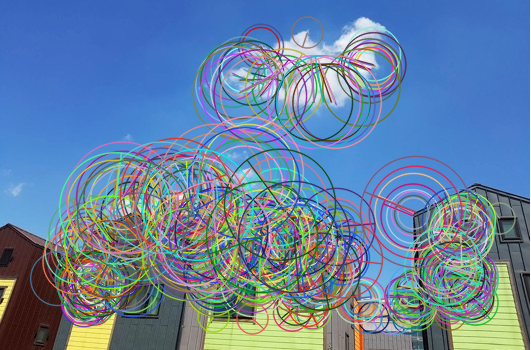

In [7]:
# ORB로 특징점 및 특징 디스크립터 검출 (desc_orb.py)

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/가은/2021/영상처리/images/house.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# ORB 추출기 생성
orb = cv2.ORB_create()
# 키 포인트 검출과 서술자 계산
keypoints, descriptor = orb.detectAndCompute(img, None)
# 키 포인트 그리기
img_draw = cv2.drawKeypoints(img, keypoints, None, \
             flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# 결과 출력
cv2_imshow(img_draw)
cv2.waitKey()
cv2.destroyAllWindows()

# 특징 매칭(Feature Matching)
* 특징 매칭이란 서로 다른 두 이미지에서 특징점과 특징 디스크립터들을 비교해서 비슷한 객체끼리 짝짓는 것을 말합니다. 

* OpenCV는 특징 매칭을 위해 아래와 같은 특징 매칭 인터페이스 함수를 제공합니다.

## matcher = cv2.DescriptorMatcher_create(matcherType): 매칭기 생성자
> * matcherType: 생성할 구현 클래스의 알고리즘
** ("BruteForce": NORM_L2를 사용하는 BFMatcher,
** "BruteForce-L1": NORM_L1을 사용하는 BFMatcher,
** "BruteForce-Hamming": NORM_HAMMING을 사용하는 BRMatcher,
** "BruteForce-Hamming(2)": NORM_HAMMING2를 사용하는 BFMatcher,
** "FlannBased": NORM_L2를 사용하는 FlannBasedMatcher)

In [22]:
# BFMatcher와 SIFT로 매칭 (match_bf_sift.py)

import cv2, numpy as np
from google.colab.patches import cv2_imshow

img1 = cv2.imread('/content/drive/MyDrive/가은/2021/영상처리/images/taekwonv1.jpg')
img2 = cv2.imread('/content/drive/MyDrive/가은/2021/영상처리/images/figures.jpg')
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# SIFT 서술자 추출기 생성 ---①
detector = cv2.xfeatures2d.SIFT_create()
# 각 영상에 대해 키 포인트와 서술자 추출 ---②
kp1, desc1 = detector.detectAndCompute(gray1, None)
kp2, desc2 = detector.detectAndCompute(gray2, None)

# BFMatcher 생성, L1 거리, 상호 체크 ---③
matcher = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
# 매칭 계산 ---④
matches = matcher.match(desc1, desc2)
# 매칭 결과 그리기 ---⑤
res = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, \
                      flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
# 결과 출력 
cv2_imshow(res)
cv2.waitKey()
cv2.destroyAllWindows()

In [22]:
# BFMatcher와 SURF로 매칭 (match_bf_surf.py)

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img1 = cv2.imread('/content/drive/MyDrive/가은/2021/영상처리/images/taekwonv1.jpg')
img2 = cv2.imread('/content/drive/MyDrive/가은/2021/영상처리/images/figures.jpg')
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# SURF 서술자 추출기 생성 ---①
detector = cv2.xfeatures2d.SURF_create()
kp1, desc1 = detector.detectAndCompute(gray1, None)
kp2, desc2 = detector.detectAndCompute(gray2, None)

# BFMatcher 생성, L2 거리, 상호 체크 ---③
matcher = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
# 매칭 계산 ---④
matches = matcher.match(desc1, desc2)
# 매칭 결과 그리기 ---⑤
res = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, \
                     flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

cv2_imshow(res)
cv2.waitKey()
cv2.destroyAllWindows()

matches:131


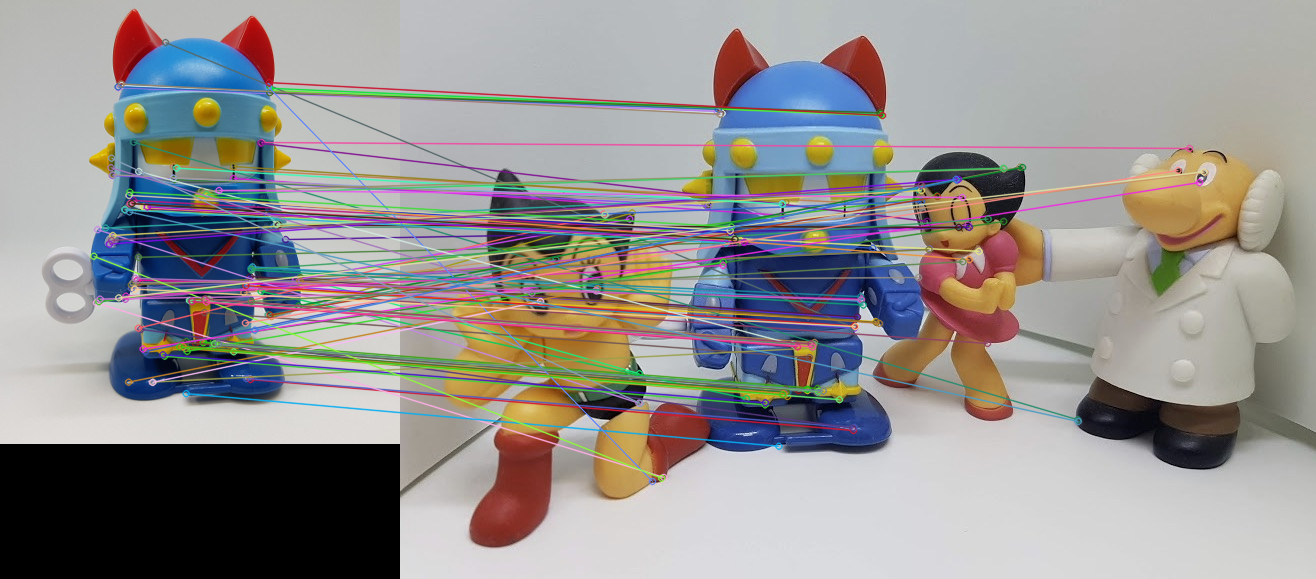

In [15]:
# BFMatcher와 ORB로 매칭 (match_bf_orb.py)

import cv2, numpy as np
from google.colab.patches import cv2_imshow

img1 = cv2.imread('/content/drive/MyDrive/가은/2021/영상처리/images/taekwonv1.jpg')
img2 = cv2.imread('/content/drive/MyDrive/가은/2021/영상처리/images/figures.jpg')
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# SIFT 서술자 추출기 생성 ---①
detector = cv2.ORB_create()
# 각 영상에 대해 키 포인트와 서술자 추출 ---②
kp1, desc1 = detector.detectAndCompute(gray1, None)
kp2, desc2 = detector.detectAndCompute(gray2, None)

# BFMatcher 생성, Hamming 거리, 상호 체크 ---③
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# 매칭 계산 ---④
matches = matcher.match(desc1, desc2)

# 매칭 개수
print(f'matches:{len(matches)}')
# 매칭 결과 그리기 ---⑤
res = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, \
                     flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

cv2_imshow(res)
cv2.waitKey()
cv2.destroyAllWindows()

# FLANN(Fast Library for Approximate Nearest Neighbors Matching)
* BFMatcher는 모든 디스크립터를 전수 조사하므로 이미지 사이즈가 클 경우 속도가 굉장히 느립니다.
* 이를 해결하기 위해 FLANN을 사용할 수 있습니다.
* FLANN은 모든 디스크립터를 전수 조사하기 보다 이웃하는 디스크립터끼리 비교를 합니다.
* 이웃하는 디스크립터를 찾기 위해 FLANN 알고리즘 함수에 인덱스 파라미터와 검색 파라미터를 전달

## matcher = cv2.FlannBasedMatcher(indexParams, searchParams)

> 파라미터로 전달 받는 인덱스 파라미터와 검색 파라미터는 다음과 같은 값을 갖습니다.

## indexParams: 인덱스 파라미터 (딕셔너리)

* algorithm: 알고리즘 선택 키, 선택할 알고리즘에 따라 종속 키를 결정하면 됨
* FLANN_INDEX_LINEAR=0: 선형 인덱싱, BFMatcher와 동일
* FLANN_INDEX_KDTREE=1: KD-트리 인덱싱 (trees=4: 트리 개수(16을 권장))
* FLANN_INDEX_KMEANS=2: K-평균 트리 인덱싱
** (branching=32: 트리 분기 개수, iterations=11: 반복 횟수, centers_init=0: 초기 중심점 방식)
* FLANN_INDEX_COMPOSITE=3: KD-트리, K-평균 혼합 인덱싱
** (trees=4: 트리 개수, branching=32: 트리 분기 새수, iterations=11: 반복 횟수, centers_init=0: 초기 중심점 방식)
* FLANN_INDEX_LSH=6: LSH 인덱싱
** (table_number: 해시 테이블 수, key_size: 키 비트 크기, multi_probe_level: 인접 버킷 검색)
* FLANN_INDEX_AUTOTUNED=255 : 자동 인덱스
** (target_precision=0.9: 검색 백분율, build_weight=0.01: 속도 우선순위, memory_weight=0.0: 메모리 우선순위, sample_fraction=0.1: 샘플 비율)
* searchParams: 검색 파라미터 (딕셔너리)

## searchParams: 검색 파라미터 (딕셔너리)
* checks=32: 검색할 후보 수
* eps=0.0: 사용 안 함
* sorted=True: 정렬해서 반환

In [ ]:
# FLANNMatcher와 SIFT로 매칭 (match_flann_sift.py)

import cv2, numpy as np
from google.colab.patches import cv2_imshow

img1 = cv2.imread('/content/drive/MyDrive/가은/2021/영상처리/images/taekwonv1.jpg')
img2 = cv2.imread('/content/drive/MyDrive/가은/2021/영상처리/images/figures.jpg')
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# SIFT 생성
detector = cv2.xfeatures2d.SIFT_create()
# 키 포인트와 서술자 추출
kp1, desc1 = detector.detectAndCompute(gray1, None)
kp2, desc2 = detector.detectAndCompute(gray2, None)

# 인덱스 파라미터와 검색 파라미터 설정 ---①
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

# Flann 매처 생성 ---③
matcher = cv2.FlannBasedMatcher(index_params, search_params)
# 매칭 계산 ---④
matches = matcher.match(desc1, desc2)
# 매칭 그리기
res = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, \
                flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

cv2_imshow(res)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
# FLANNMatcher와 SURF로 매칭 (match_flann_surf.py)

import cv2, numpy as np
from google.colab.patches import cv2_imshow

img1 = cv2.imread('/content/drive/MyDrive/가은/2021/영상처리/images/taekwonv1.jpg')
img2 = cv2.imread('/content/drive/MyDrive/가은/2021/영상처리/images/figures.jpg')
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# SURF 생성
detector = cv2.xfeatures2d.SURF_create()
# 키 포인트와 서술자 추출
kp1, desc1 = detector.detectAndCompute(gray1, None)
kp2, desc2 = detector.detectAndCompute(gray2, None)

# 인덱스 파라미터와 검색 파라미터 설정 ---①
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

# Flann 매처 생성 ---③
matcher = cv2.FlannBasedMatcher(index_params, search_params)
# 매칭 계산 ---④
matches = matcher.match(desc1, desc2)
# 매칭 그리기
res = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, \
                flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

cv2_imshow(res)
cv2.waitKey()
cv2.destroyAllWindows()

# of kp1 : 500 / # of kp2 : 500
matches : 4 / 500


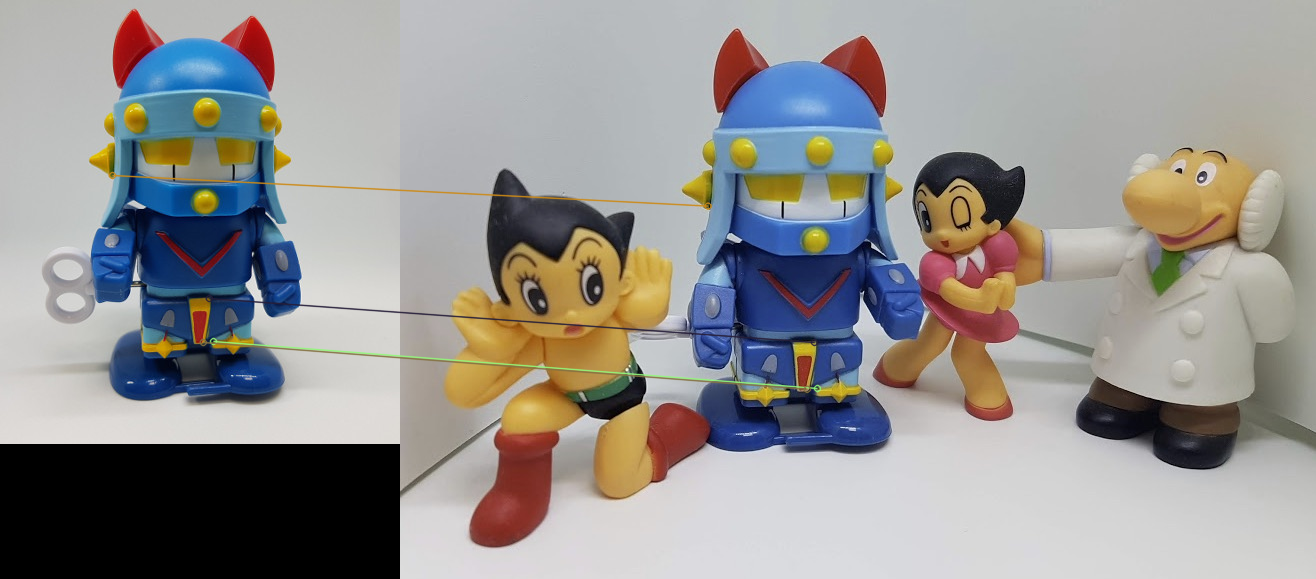

In [22]:
# FLANNMatcher와 ORB로 매칭 (match_flann_orb.py)

import cv2, numpy as np
from google.colab.patches import cv2_imshow

img1 = cv2.imread('/content/drive/MyDrive/가은/2021/영상처리/images/taekwonv1.jpg')
img2 = cv2.imread('/content/drive/MyDrive/가은/2021/영상처리/images/figures.jpg')
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# ORB 추출기 생성
detector = cv2.ORB_create()
# 키 포인트와 서술자 추출
kp1, desc1 = detector.detectAndCompute(gray1, None)
kp2, desc2 = detector.detectAndCompute(gray2, None)
print(f'# of kp1 : {len(kp1)} / # of kp2 : {len(kp2)}')

# # 인덱스 파라미터 설정 ---①
# FLANN_INDEX_LSH = 6
# index_params= dict(algorithm = FLANN_INDEX_LSH,
#                    table_number = 6,
#                    key_size = 12,
#                    multi_probe_level = 1)
# # 검색 파라미터 설정 ---②
# search_params=dict(checks=32)


# brute-force matcher :query descriptor 와 train descriptor 를 전수조사
# NORM_Hamming 을 distance로 사용
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)   # knnMatch 사용을 위해서는 crossCheck=False 이어야함

# knnMatch, k = 2 : 최근접 이웃 2개를 distance 가 작은 순으로 반환
matches = matcher.knnMatch(desc1, desc2,2)

# 첫번째 이웃의 거리가 두번째 이웃 거리의 75% 이내인 것만 추출
ratio = 0.55
good_matches = [first for first, second in matches \
                if first.distance < second.distance * ratio]
print(f'matches : {len(good_matches)} / {len(matches)}')

# 매칭 그리기
res = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, \
            flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
# 결과 출력            
cv2_imshow(res)
cv2.waitKey()
cv2.destroyAllWindows()